Sasithorn Sirintrawutthiwong 6410422035

Ranking 9    Score 0.98400

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestClassifier


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/dads6003-in-class-competition/sampleSubmission.csv
/kaggle/input/dads6003-in-class-competition/train.csv
/kaggle/input/dads6003-in-class-competition/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/dads6003-in-class-competition/train.csv')
df.head()
dftest = pd.read_csv('/kaggle/input/dads6003-in-class-competition/test.csv')
dftest.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
0,-14.880285,-413.657030,17.037929,5.627481,6.262187,704.164878,-269.815659,13.503896,60805.03782,31.065906,5.625478,5.150013,6282.637653,174.281276,19.959450,32.278906,206.323118,8.337124,232.140628,-5.120450
1,-13.987087,-235.197680,53.670585,4.743702,4.670301,1226.941573,-184.656449,7.034055,55445.68723,15.189238,15.746002,3.880180,3759.028105,32.216142,17.054081,35.934156,191.790254,10.985527,267.024627,-5.200961
2,-11.764850,-192.880170,38.687566,5.606648,4.147060,940.690132,-182.564985,17.218596,31562.61815,34.769586,12.766144,4.885215,6722.719526,181.736690,20.479688,33.809666,166.718488,7.087623,115.762593,-6.080712
3,-10.790193,-204.849932,50.837951,5.934410,5.310772,794.581702,-245.911853,9.936746,47299.76010,25.565751,14.068207,7.156563,5651.188202,127.570137,20.904829,49.857911,139.872041,9.597151,213.574163,-6.355565
4,-17.113392,-141.457819,53.246627,5.939751,5.631022,543.441438,-302.081360,21.861266,66725.53006,34.796947,13.834198,4.743589,5376.558510,119.269139,19.826086,39.903060,311.541001,12.573611,263.709173,-4.329967


**1. Cleansing data**

In [3]:
df2 = df.dropna()

**2. Exploratory Data Analysis**

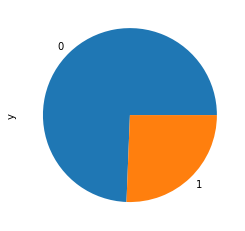

In [4]:
df2['y'].value_counts().plot.pie();

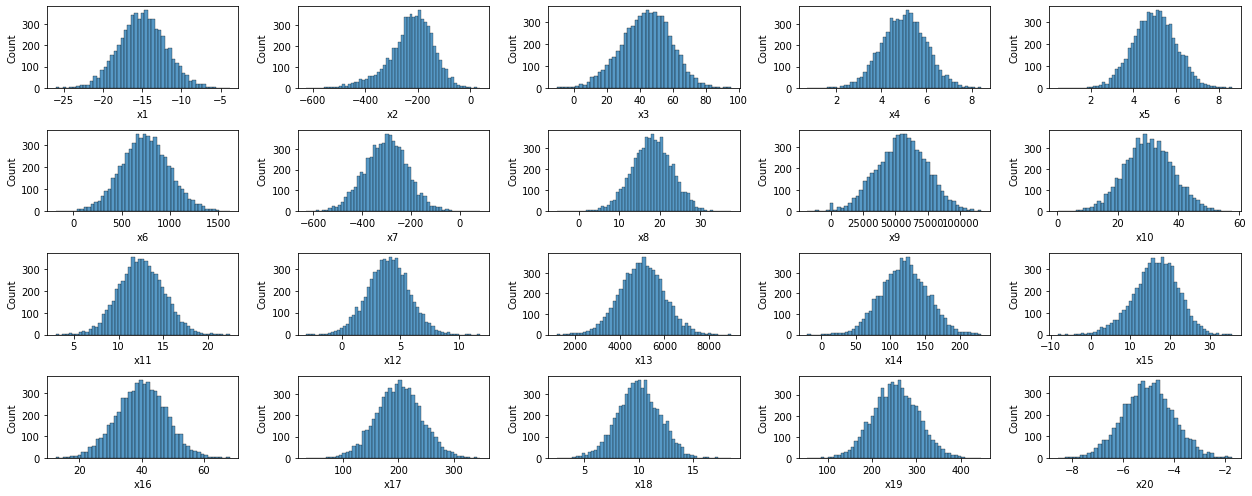

In [5]:
n_cols = 5
n_rows, mod = divmod(len(df2.columns[1:]), n_cols)
n_rows +=  int(mod > 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*1.75), tight_layout=True)
axes = axes.ravel()
for col, ax in zip(df2.columns[0:], axes):
    sns.histplot(df2[col], ax=ax)
plt.show()

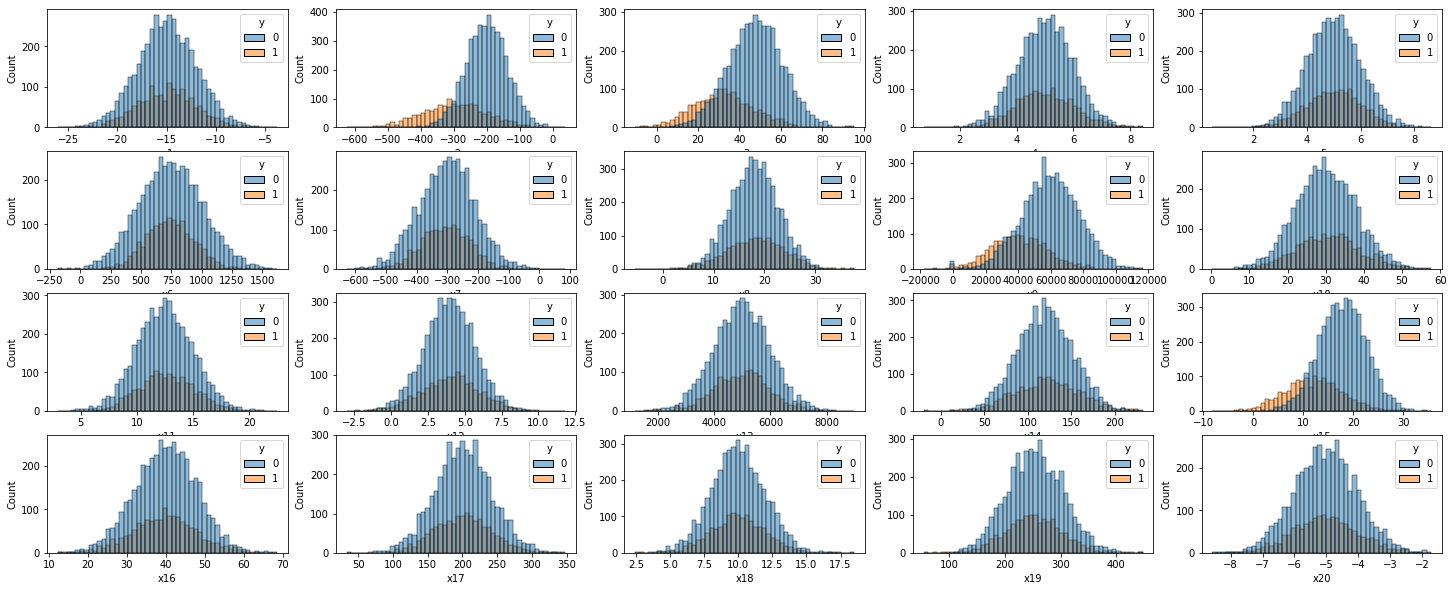

In [6]:
fig, axes = plt.subplots(4,5, figsize=(25,10))
axes = axes.ravel()
sns.histplot(data=df2, x='x1',bins=50, hue='y', ax=axes[0])
sns.histplot(data=df2, x='x2',bins=50, hue='y', ax=axes[1])
sns.histplot(data=df2, x='x3',bins=50, hue='y', ax=axes[2])
sns.histplot(data=df2, x='x4',bins=50, hue='y', ax=axes[3])
sns.histplot(data=df2, x='x5',bins=50, hue='y', ax=axes[4])
sns.histplot(data=df2, x='x6',bins=50, hue='y', ax=axes[5])
sns.histplot(data=df2, x='x7',bins=50, hue='y', ax=axes[6])
sns.histplot(data=df2, x='x8',bins=50, hue='y', ax=axes[7])
sns.histplot(data=df2, x='x9',bins=50, hue='y', ax=axes[8])
sns.histplot(data=df2, x='x10',bins=50, hue='y', ax=axes[9])
sns.histplot(data=df2, x='x11',bins=50, hue='y', ax=axes[10])
sns.histplot(data=df2, x='x12',bins=50, hue='y', ax=axes[11])
sns.histplot(data=df2, x='x13',bins=50, hue='y', ax=axes[12])
sns.histplot(data=df2, x='x14',bins=50, hue='y', ax=axes[13])
sns.histplot(data=df2, x='x15',bins=50, hue='y', ax=axes[14])
sns.histplot(data=df2, x='x16',bins=50, hue='y', ax=axes[15])
sns.histplot(data=df2, x='x17',bins=50, hue='y', ax=axes[16])
sns.histplot(data=df2, x='x18',bins=50, hue='y', ax=axes[17])
sns.histplot(data=df2, x='x19',bins=50, hue='y', ax=axes[18])
sns.histplot(data=df2, x='x20',bins=50, hue='y', ax=axes[19])
plt.show();

In [7]:
#Feature Important: Select top 10 most important feautures

feature_cols = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20']
X = df2[feature_cols]
y = df2.y
clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X,y)
feature_imp = pd.Series(clf.feature_importances_,index=feature_cols).sort_values(ascending=False)
print(feature_imp)

x2     0.234427
x15    0.136968
x3     0.124674
x9     0.120649
x14    0.070590
x7     0.054041
x6     0.050467
x10    0.040809
x12    0.028885
x8     0.028425
x4     0.011392
x20    0.011337
x19    0.011038
x18    0.011003
x13    0.010999
x16    0.010990
x5     0.010942
x11    0.010931
x17    0.010805
x1     0.010628
dtype: float64


In [8]:
df2

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,y
0,-10.731014,-166.447703,57.634618,5.851483,6.443051,773.535357,-425.516507,19.541551,102333.24180,37.515512,...,1.177903,4531.019914,65.320993,10.856422,42.317769,215.727832,9.922942,194.151039,-4.580311,0
1,-11.357862,-175.583196,61.413742,4.957525,6.022880,592.665369,-154.993322,17.165756,56410.00878,33.667832,...,6.288225,5745.900235,124.629610,19.519498,37.481917,193.590955,10.280823,159.152326,-4.361565,0
2,-19.008191,-266.301983,43.228042,5.173549,5.569678,912.741203,-337.001477,18.362978,37204.35472,24.194495,...,5.241047,5369.285274,136.536890,16.824492,31.761223,195.816664,9.604161,148.690528,-5.322491,1
4,-11.518749,-345.861627,37.470283,6.178874,5.527774,634.255353,-243.072126,16.785630,62397.51981,39.815572,...,5.366404,6161.928292,61.414626,15.990853,51.659323,203.356424,12.552922,241.868249,-4.889072,1
5,-9.978363,-217.954903,42.192909,4.715607,4.608674,638.979705,-468.733610,18.117950,79225.09789,24.621960,...,3.645854,6607.092724,76.068454,14.061988,53.488618,219.314334,10.308929,182.201515,-5.970472,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7494,-15.382308,-331.033015,25.898913,4.507524,7.422550,157.265375,-294.678666,20.479309,43743.86320,37.892774,...,5.996481,5198.297479,133.720603,13.199810,31.856185,150.681186,8.354579,210.312696,-5.431102,0
7495,-22.976076,-87.741044,71.575697,5.133005,5.005782,374.673090,-231.697183,22.082335,71968.29468,33.312879,...,6.247279,4814.522334,92.784789,20.056762,31.408226,250.550332,10.088208,235.970697,-4.691113,0
7496,-14.769648,-59.981381,71.580937,4.665601,4.794020,926.146773,-158.936881,22.423359,43085.02045,39.211047,...,1.836617,5667.375520,137.550813,15.212581,41.660239,237.096094,8.784662,357.238315,-5.386656,0
7497,-11.506576,-170.005713,73.463259,3.458829,4.817631,628.897187,-323.776913,19.536800,77637.05102,23.025941,...,1.411486,4894.120531,58.662358,18.990424,44.648430,155.672618,9.637743,267.242115,-4.762964,0


In [9]:
feature_cols2 = ['x2','x3','x6','x7','x8','x9','x10','x12','x14','x15']

In [10]:



# 3. Training data - Crossvalidation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df3= scaler.fit_transform(df2)

df4 = pd.DataFrame({'x1': df3[:, 0], 'x2': df3[:, 1], 'x3': df3[:, 2], 'x4': df3[:, 3], 'x5': df3[:, 4], 'x6': df3[:, 5], 'x7': df3[:, 6], 'x8': df3[:, 7], 'x9': df3[:, 8], 'x10': df3[:, 9], 'x11': df3[:, 10], 'x12': df3[:, 11], 'x13': df3[:, 12], 'x14': df3[:, 13], 'x15': df3[:, 14], 'x16': df3[:, 15], 'x17': df3[:, 16], 'x18': df3[:, 17], 'x19': df3[:, 18], 'x20': df3[:, 19], 'y': df3[:, 20]})

df4


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,y
0,1.421080,0.693875,0.905046,0.857595,1.445430,0.110570,-1.404288,0.290635,2.422297,0.899619,...,-1.572066,-0.451651,-1.636288,-0.985627,0.300578,0.363244,-0.031862,-1.179933,0.442582,-0.587062
1,1.210338,0.586143,1.154253,-0.051377,1.025267,-0.616569,1.666149,-0.183265,0.078349,0.422666,...,1.279989,0.767996,0.134102,0.551891,-0.307939,-0.180570,0.151627,-1.874197,0.664238,-0.587062
2,-1.361650,-0.483681,-0.044967,0.168275,0.572073,0.670209,-0.399643,0.055545,-0.901919,-0.751635,...,0.695562,0.389903,0.489540,0.073583,-1.027800,-0.125893,-0.195304,-2.081726,-0.309474,1.703398
3,1.156248,-1.421908,-0.424651,1.190484,0.530169,-0.449368,0.666455,-0.259089,0.383955,1.184731,...,0.765524,1.185656,-1.752895,-0.074371,1.476068,0.059328,1.316550,-0.233375,0.129713,1.703398
4,1.674116,0.086464,-0.113227,-0.297359,-0.388915,-0.430375,-1.894802,0.006669,1.242844,-0.698647,...,-0.194710,1.632567,-1.315471,-0.416705,1.706256,0.451350,0.166036,-1.416974,-0.966077,-0.587062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5980,-0.142653,-1.247038,-1.187703,-0.508937,2.424912,-2.366976,0.080721,0.477689,-0.568138,0.946384,...,1.117168,0.218245,0.405472,-0.569724,-1.015850,-1.234691,-0.835975,-0.859337,-0.419530,-0.587062
5981,-2.695626,1.622043,1.824363,0.127049,0.008187,-1.492948,0.795561,0.797445,0.872453,0.378667,...,1.257138,-0.167036,-0.816481,0.647245,-1.072219,1.218694,0.052871,-0.350364,0.330305,-0.587062
5982,0.063319,1.949406,1.824708,-0.348204,-0.203572,0.724102,1.621390,0.865469,-0.601766,1.109795,...,-1.204440,0.689163,0.519806,-0.212498,0.217838,0.888177,-0.615468,2.055202,-0.374493,-0.587062
5983,1.160341,0.651917,1.948834,-1.575245,-0.179961,-0.470909,-0.249544,0.289687,1.161789,-0.896487,...,-1.441704,-0.087126,-1.835051,0.457991,0.593856,-1.112071,-0.178086,0.269962,0.257499,-0.587062


In [11]:
feature_cols2 = ['x2','x3','x6','x7','x8','x9','x10','x12','x14','x15']
X = df4[feature_cols2]
y = df2.y

from sklearn.model_selection import train_test_split
#X, y = make_classification(random_state=0)
#print("X = ",X)
#print("y = ",y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123) #75:25

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), activation='relu',solver='adam',max_iter=500)
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=500)

In [12]:
y_pred = mlp.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


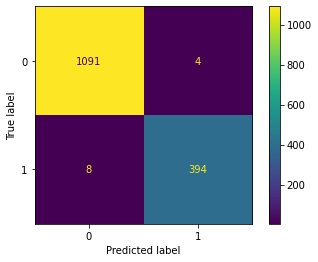

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlp, X_test, y_test)
plt.show()

In [14]:
#y_test = y_test.to_list()

In [15]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
# 4. Testing data
from sklearn import metrics
from sklearn.metrics import confusion_matrix

y_true = y_test
y_pred

test = confusion_matrix(y_true, y_pred)
print(test.shape) #2D array
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel() #1D array
print("tp=",tp," fp=",fp)
print("fn=",fn," tn=", tn)

precision = metrics.precision_score(y_true, y_pred)
recall = metrics.recall_score(y_true, y_pred)
f1 = metrics.f1_score(y_true, y_pred)
accuracy = metrics.accuracy_score(y_true, y_pred)

print("accuracy = ", accuracy)
print("precision = ",precision)
print("recall = ", recall)
print("f1 = ", f1)

print("**************")

target_names = ['class 0', 'class 1']
print(metrics.classification_report(y_true, y_pred, target_names=target_names))

(2, 2)
tp= 394  fp= 4
fn= 8  tn= 1091
accuracy =  0.9919839679358717
precision =  0.9899497487437185
recall =  0.9800995024875622
f1 =  0.985
**************
              precision    recall  f1-score   support

     class 0       0.99      1.00      0.99      1095
     class 1       0.99      0.98      0.98       402

    accuracy                           0.99      1497
   macro avg       0.99      0.99      0.99      1497
weighted avg       0.99      0.99      0.99      1497



In [17]:
# output
predict = np.random.choice([0, 1], size=(2500,), p=[1./3, 2./3])
fields = ['id','Expected']
df = pd.DataFrame()
id = list(range(1,2501))
df['id']=pd.Series(id)
df['Expected']=pd.Series(predict)
df.to_csv('submit.csv', index=False)